In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
#     Dense(16, activation='relu'),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Print the model summary
model.weights


[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.00939999, -0.01960766,  0.03710797, ..., -0.03342058,
         -0.01281486,  0.06238365],
        [ 0.010611  ,  0.08575179,  0.01798813, ..., -0.00221647,
         -0.04198793,  0.03293117],
        [-0.06796078, -0.03208922,  0.06735303, ..., -0.01966904,
          0.06937991, -0.05441526],
        ...,
        [-0.05367529, -0.07906594,  0.08162594, ...,  0.01961738,
          0.03571539, -0.05781095],
        [-0.00191581, -0.06809134, -0.08049232, ...,  0.05084537,
          0.08625291, -0.08061051],
        [ 0.07725328,  0.00331062,  0.02482736, ..., -0.00431927,
          0.00534624,  0.01615526]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 2.51965791e-01, -8.77037048e-02, -3.14093143e-

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(filters=16, 
           kernel_size=3, 
#            padding='SAME', 
#            strides=2, 
           activation='relu', 
           input_shape=(28, 28, 1)),
    MaxPooling2D(
#         pool_size=(3, 3),
        pool_size=3,
    ),
    Flatten(),
    Dense(10, activation='softmax')
])


In [7]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt, 
             loss='sparse_categorical_crossentropy', 
             metrics=[acc, mae])

In [9]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.learning_rate)
# print(model.)
# print(model.)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7fcb5421eef0>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7fcb5421ca58>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.

label - Ankle boot


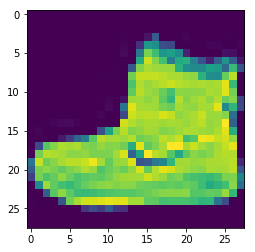

In [15]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
print(f"label - {labels[train_labels[i]]}")

#### Fit the model

In [16]:
# Fit the model

model.fit(train_images, train_labels, epochs=2, batch_size=256)

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (60000, 28, 28)

In [18]:
# Fit the model
# error was because, expected conv2d_input to have 4 dimensions, but got array with shape (60000, 28, 28), lets try again

# one way
# history = model.fit(train_images[..., np.newaxis], train_labels, epochs=2, batch_size=256)

# another way
history = model.fit(np.expand_dims(train_images, axis=-1), train_labels, epochs=2, batch_size=256)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 54s 906us/sample - loss: 0.5668 - sparse_categorical_accuracy: 0.8029 - mean_absolute_error: 4.4200
Epoch 2/2
60000/60000 [==============================] - 52s 872us/sample - loss: 0.3682 - sparse_categorical_accuracy: 0.8701 - mean_absolute_error: 4.4200


In [19]:
history = model.fit(np.expand_dims(train_images, axis=-1), 
                    train_labels, 
                    epochs=8, 
                    batch_size=256, 
                    verbose=2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 51s - loss: 0.3310 - sparse_categorical_accuracy: 0.8821 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 50s - loss: 0.3133 - sparse_categorical_accuracy: 0.8882 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 49s - loss: 0.3006 - sparse_categorical_accuracy: 0.8922 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 50s - loss: 0.2922 - sparse_categorical_accuracy: 0.8949 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 50s - loss: 0.2854 - sparse_categorical_accuracy: 0.8979 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 50s - loss: 0.2784 - sparse_categorical_accuracy: 0.8993 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 49s - loss: 0.2714 - sparse_categorical_accuracy: 0.9030 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 49s - loss: 0.2663 - sparse_categorical_accuracy: 0.9039 - mean_absolute_error: 4.4200


#### Plot training history

In [20]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.331006,0.882133,4.419999
1,0.313345,0.888250,4.420001
2,0.300639,0.892167,4.420000
3,0.292159,0.894917,4.420001
4,0.285380,0.897933,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

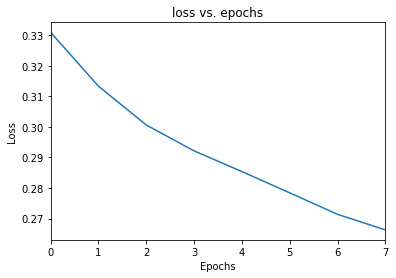

In [21]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='loss vs. epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

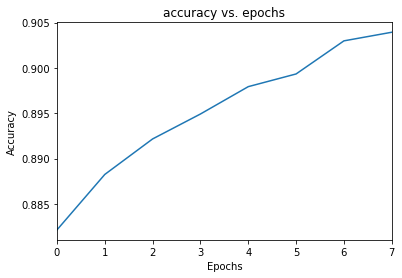

In [22]:
# Make a plot for the accuracy
loss_plot = df.plot(y='sparse_categorical_accuracy', title='accuracy vs. epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Accuracy')


[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

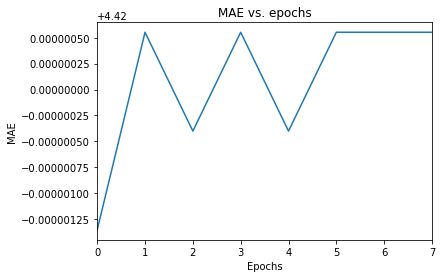

In [23]:
# Make a plot for the additional metric
loss_plot = df.plot(y='mean_absolute_error', title='MAE vs. epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='MAE')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [25]:
# Evaluate the model
model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)


10000/1 - 6s - loss: 0.3557 - sparse_categorical_accuracy: 0.8817 - mean_absolute_error: 4.4200


[0.32013597425222395, 0.8817, 4.419997]

#### Make predictions from the model

(28, 28)


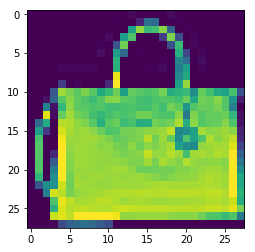

Label: Bag


In [26]:
# Choose a random test image

# random_inx = np.random.choice(test_images.shape[0])
random_idx = 30

test_image = test_images[random_idx, :, :]
print(test_image.shape)
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")


In [31]:
# Get the model predictions
model.predict(test_image[np.newaxis, ..., np.newaxis])

array([[1.9458339e-09, 1.3605845e-12, 8.7626892e-09, 5.9290870e-09,
        2.7201987e-09, 9.9848680e-12, 1.8583442e-08, 3.1904107e-13,
        1.0000000e+00, 2.8807583e-12]], dtype=float32)

In [32]:
ans = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model Prediction - {labels[np.argmax(ans)]}")

Model Prediction - Bag
